Author-Anisha<br>
Description- This project focuses on utilizing data science techniques in the field of Natural Language Processing (NLP) to develop a system for detecting spam messages.


## Spam Message Detection




In [6]:
import nltk
import string
from nltk.corpus import stopwords

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#data collection
message= pd.read_csv(r"C:\Users\anish\Downloads\archive (7)\emailsdata.csv")
message.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1



## Exploratory Data Analysis


In [10]:
#group the data by the spam column
message.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [11]:
#adding the length column in the message dataframe
message['length']=message['text'].apply(len)
message


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [12]:
#using describe function for the length
message['length'].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [13]:
#looking for the longest text
message[message['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

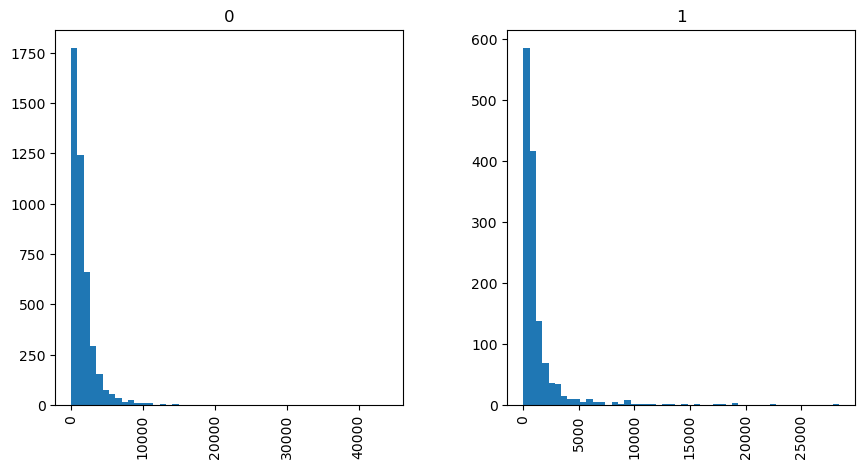

In [14]:
#comparing the graph of spam and not spam message
message.hist(column='length',by='spam', bins=50,figsize=(10,5))


In [15]:
#define the function  of text preprocessing
def text_process(mess):
    """
    remove all punctuation
    remove all stop wprds
    return a list of the clean text"""
    nonpunc=[char for char in mess if char not in string.punctuation]
    #join the character again to form string
    nonpunc=''.join(nonpunc)
    #remove the stop words
    return[word for word in nonpunc.split()if word.lower()  not in stopwords.words('english')]

In [19]:
#calling function text 
text_process(message['text'])

['Subject:',
 'naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'really',
 'hard',
 'recollect',
 'company',
 ':',
 'market',
 'full',
 'suqgestions',
 'information',
 'isoverwhelminq',
 ';',
 'good',
 'catchy',
 'logo',
 ',',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'make',
 'task',
 'much',
 'easier',
 '.',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'become',
 'world',
 'ieader',
 ':',
 'isguite',
 'ciear',
 'without',
 'good',
 'products',
 ',',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 ';',
 'promise',
 'marketing',
 'efforts',
 'become',
 'much',
 'effective',
 '.',
 'list',
 'clear',
 'benefits',
 ':',
 'creativeness',
 ':',
 'hand',
 '-',
 'made',
 ',',
 'original',
 'logos',
 ',',
 'specially',
 'done',
 'reflect',
 'distinctive',
 'company',
 'image',
 '.',
 'convenience',
 ':',
 'logo',
 'stationery',
 'provided',
 'formats',
 ';',
 'easy',
 '-',
 '-',
 '

In [20]:
message.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [21]:
#applying the text processing
message['text'].head(5).apply(text_process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
#feature extraction
bow=CountVectorizer(analyzer=text_process)

In [24]:
#calculate the countVectorizer method
bow.fit(message['text'])

CountVectorizer(analyzer=<function text_process at 0x000001E8B599E8B0>)

In [26]:
#transforming to entire message
message_bow= bow.transform(message['text'])

In [27]:
print('Shape of matrix:', message_bow.shape)
print('Amount of Non-Zero occurences:', message_bow.nnz)

Shape of matrix: (5728, 37229)
Amount of Non-Zero occurences: 565908


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [29]:
#features
X=message_bow

In [30]:
# targets
y=message['spam']

#### Train Test Split


In [31]:
## Spam Message Detection
#spliting the data into train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Using Naive Bayes Classifier


In [32]:
# initialize the naive bayes classifier
model=MultinomialNB()

In [33]:
#define hyperparameter tuning
param_grid={'alpha':[0.1,1.0,0.01]}

In [34]:
#initialize the gridsearchCv for hyperparametertunning
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [35]:
# perform the grid search
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 0.01]})

In [36]:
#find the best hyperparameters
grid_search.best_params_

{'alpha': 0.01}

In [38]:
# use the model with best_parameter
best_model=MultinomialNB(alpha=0.01)

In [39]:
#train the model with best hyperparameter
best_model.fit(X_train,y_train)

MultinomialNB(alpha=0.01)

In [40]:
#make prediction
y_pred=best_model.predict(X_test)


## Model evaluation


In [41]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
#printing results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9901105293775451
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1278
           1       0.98      0.98      0.98       441

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719

